In [3]:
from datasets import load_dataset
import pandas as pd

from utils.filemanagement import save_preprocessed_df_to_file,load_from_file

In [4]:
dataset = load_dataset("NbAiLab/norwegian_parliament")

Found cached dataset norwegian_parliament (C:/Users/lotfi/.cache/huggingface/datasets/NbAiLab___norwegian_parliament/default/1.0.0/0ef7cafbd6791012727b235682443606a30da1177ae233308cbd4e6801c38fe8)


  0%|          | 0/3 [00:00<?, ?it/s]

In [5]:
dataset.items()

dict_items([('train', Dataset({
    features: ['text', 'label', 'date'],
    num_rows: 3600
})), ('validation', Dataset({
    features: ['text', 'label', 'date'],
    num_rows: 1200
})), ('test', Dataset({
    features: ['text', 'label', 'date'],
    num_rows: 1200
}))])

In [6]:
print(type(dataset['train']))

rek = pd.DataFrame()

<class 'datasets.arrow_dataset.Dataset'>


In [7]:
wer = dataset["train"]['text']
reuisi = []
for item in wer:
    reuisi.append(item.lower())
dataset['train'].rename_columns({'text':'old_text'})

rek['text'] = reuisi
rek['label'] = dataset['train']['label']
rek['date'] = dataset['train']['date']
rr = dataset['train']
import matplotlib.pyplot as plt

In [8]:
folder_path_data = r"preprocessed_data"
file_name_data ="np_mini_raw.csv"

In [9]:
erf = save_preprocessed_df_to_file(folder_path_data,file_name_data,rek)

In [10]:
import pandas as pd
import os

In [11]:

df = load_from_file(folder_path_data,file_name_data,index_col=0)

In [12]:
df.describe()

,label
count,3600.000000
mean,0.500000
std,0.500069
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [13]:
df.head()

,text,label,date
0,det var spesielt det representanten harald tom...,1,2009-06-03
1,det er selvfølgelig en diskusjon om hvor mange...,1,2011-02-16
2,"takk for svaret, i den grad det var et svar. d...",0,2007-03-21
3,det er jo riktig at vi må til våre alternative...,0,2004-10-26
4,i dagens dagsavisen sier stortingsrepresentant...,0,2000-11-15


In [14]:
df.text.map(len).max()

16395

In [15]:
df.text.map(len).min()

27

In [16]:
import numpy as np
lengths = df["text"].str.len()
argmax = np.where(lengths == lengths.max())[0]
df.iloc[argmax]

,text,label,date
1317,la meg starte med å minne om den debatten vi h...,0,2015-04-07


In [17]:
lengths = df["text"].str.len()
argmax = np.where(lengths == lengths.min())[0]
df.iloc[argmax]

,text,label,date
2936,det er det – forslag nr. 6.,1,2000-12-07
3003,det er det som er formålet.,1,2013-04-16


In [18]:
df['date'].unique()

array(['2009-06-03', '2011-02-16', '2007-03-21', ..., '2015-05-07',
       '2007-04-17', '2009-03-23'], dtype=object)

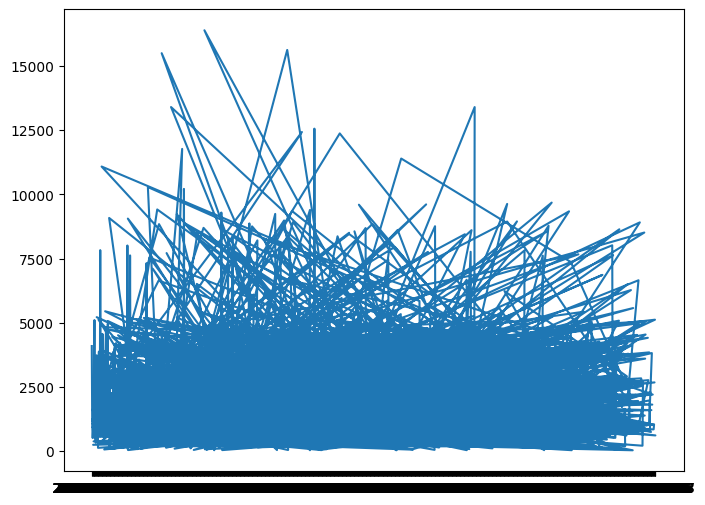

In [19]:
data = df["text"].str.len()

fig,ax = plt.subplots(figsize=(8,6))
ax.plot(df['date'],data)

df['date'] =pd.to_datetime(df['date'])

In [20]:
partier = {0:'Fremskrittspartiet',1:'Sosialistisk Venstreparti'}
df['partier'] = df['label'].map(partier)

<AxesSubplot: xlabel='partier'>

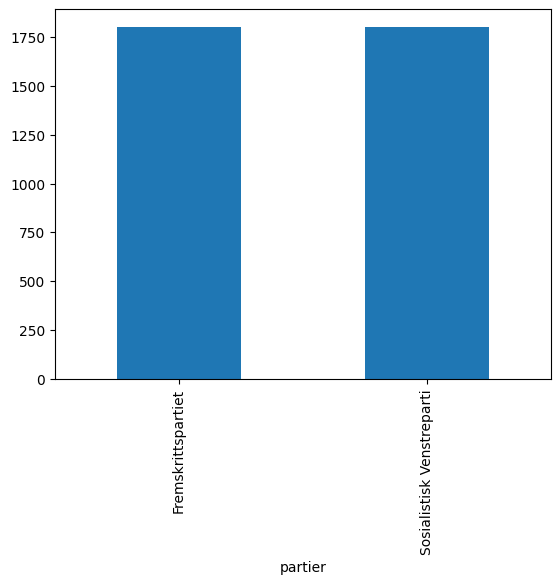

In [21]:
df.groupby('partier')['partier'].count().plot(kind='bar')

Text(0.5, 0, 'Year')

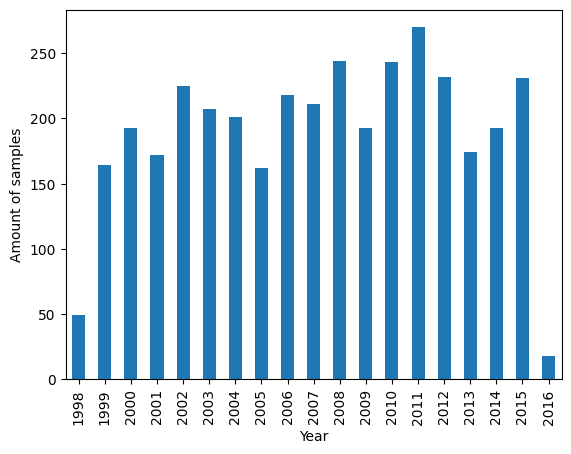

In [22]:
ar = df['text'].groupby(df['date'].dt.to_period('Y')).count().plot(kind='bar')
ar.set_ylabel("Amount of samples")
ar.set_xlabel("Year")

Text(0.5, 0, 'Year')

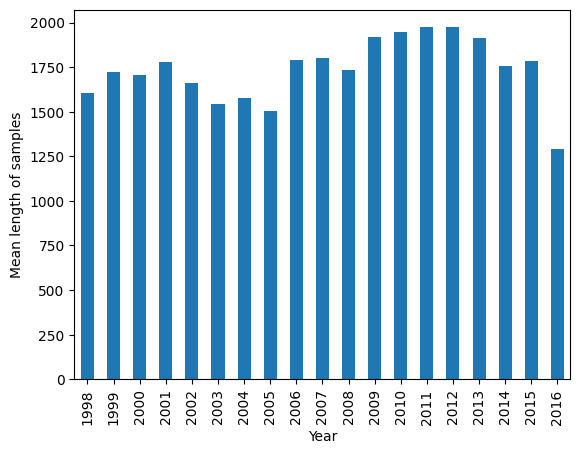

In [23]:
ax = df['text'].str.len().groupby(df['date'].dt.to_period('Y')).mean().plot(kind='bar')
ax.set_ylabel("Mean length of samples")
ax.set_xlabel("Year")

In [24]:
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

In [25]:
from wordcloud import WordCloud

In [26]:
df['new'] = df['text'].apply(lambda x: word_tokenize(x))

In [27]:
df['label'].value_counts()

1    1800
0    1800
Name: label, dtype: int64

In [28]:
freq = pd.value_counts(np.hstack(df['new']))

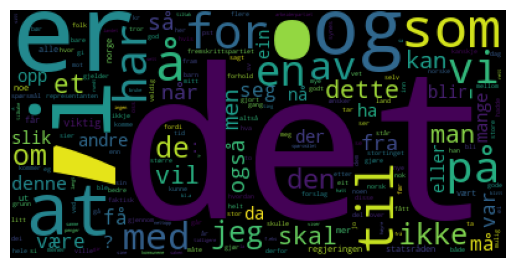

In [29]:
wordcloud = WordCloud().generate_from_frequencies(freq)

plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("npnb")
plt.show()


In [30]:
vocab = set()
df['text'].str.lower().str.split().apply(vocab.update)
print(len(vocab))

69984


In [31]:
df['new']

0       [det, var, spesielt, det, representanten, hara...
1       [det, er, selvfølgelig, en, diskusjon, om, hvo...
2       [takk, for, svaret, ,, i, den, grad, det, var,...
3       [det, er, jo, riktig, at, vi, må, til, våre, a...
4       [i, dagens, dagsavisen, sier, stortingsreprese...
                              ...                        
3595    [jeg, vil, slutte, meg, til, det, representant...
3596    [mitt, oppfølgingsspørsmål, går, til, landbruk...
3597    [jeg, tillater, meg, å, stille, statsråden, fø...
3598    [de, tre, fn-organisasjonene, som, har, fått, ...
3599    [jeg, takker, statsråden, for, tilleggssvaret,...
Name: new, Length: 3600, dtype: object

In [32]:
r = list(df['text'])

In [33]:
res = 0
for item in r:
    res+= len(item)
print(res)

6385292


In [34]:
vocab = set()
df['text'].str.lower().str.split().apply(vocab.update)
print(f"Length of vocab: {len(vocab)}")

Length of vocab: 69984


In [35]:
print(f"largest length of entry {df.text.map(len).max()}")
print(f"lowest length of entry {df.text.map(len).min()}")
r = list(df['text'])
res = 0
for item in r:
    res += len(item)
print(f"Tokens in collection {res}")

largest length of entry 16395
lowest length of entry 27
Tokens in collection 6385292


In [36]:
from utils.dataset_stats import get_data_stats
from utils.filemanagement import write_dataset_stats

stats = get_data_stats(df['text'])
print(stats)

write_dataset_stats(folder_path_data,file_name_data,stats)

[3600, 47972, 1189592, 24.797631951971983, 330.4422222222222, 196.97833333333332, 3236, 7]
